
This notebook contains a list of graphs listed in chapter 1

In [1]:
from __future__ import print_function
import numpy as np                               #for creating ndarrays for fast and efficient computations
import scipy as sc                               #for scientific computations and purposes
import pandas as pd                              #for tables
pd.options.display.max_rows = 15

import matplotlib as mpl                         #for graphing purposes
import matplotlib.pyplot as plt                  #for making plots
import matplotlib.image as mpimg                 #for images
import matplotlib.gridspec as gridspec           #for making grids
from matplotlib.path import Path
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D          #for making 3d Axes (canvas)

from ipywidgets import widgets, fixed            #imports widgets for interactivity with plots etc
from ipywidgets import interact, interactive,  FloatSlider 
from IPython.display import display

#for interactive notebooks
%matplotlib notebook


going to make some figure objects to make plots of typical broadband and gaussian linewidths

In [2]:
#This is to define the paths and cordinates to create the orange box in the linewidths figure

verts = [(4.2827e+14, 0),
        (6.6621e+14,0),
        (6.6621e+14,1),
        (4.2827e+14, 1),
        (4.2827e+14, 0)]

codes =[Path.MOVETO,            #this is the starting point
       Path.LINETO,
       Path.LINETO,
       Path.LINETO,
       Path.CLOSEPOLY,]
path=Path(verts,codes)

Next cell is for defining all the variables and arrays to produce the lines in the figures

In [3]:
#defining the arrays for the linewidth plots
v = np.linspace(1.0*10**14,1.0*10**15,1000)    # (Hz) this is the frequency range (x axis) we will be plotting 
h = 6.626 * 10 ** -34                       # (J * s) Planks constant
T =5000.0                                  # temperature of the medium
c = 3.00*10**8                              # (m / s) speed of light
k = 1.380*10**-23                           # (J / K) boltzmann constant

#for subplot

#Black Body Radiation line and properties
I_o_black = 30000000*h*v**3/(c**2)
I_black = I_o_black/(np.exp(h * v / (k * T))- 1)

#Normal distribution line and properties
sigma = 1.0         #the linewidth of the beam
carrier = 5.0e+14 #the frequency of the input beam ~~approximately 600nm
I_o_gaus = 1.0 / np.sqrt(2.0*sigma**2.0*np.pi)
I_gaus = I_o_gaus * np.exp(-(v-carrier)**2/(2*sigma**2))

#Box path for visible light
patch = patches.PathPatch(path,facecolor='orange',lw=1)

Now to actually begin making figures with matplotlib

/home/johnnguyen1792/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


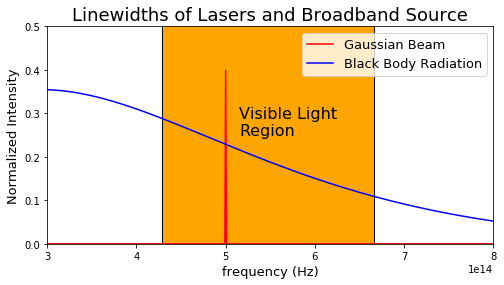

In [4]:
#I do not use the the same wording as in the documentation. Unless you really want to be an artist with
#Matplotlib, than I 
#figure object#
linewidths = plt.figure()   #creates figure object labelled linewidths so that we can place out subplots etc inside
linewidths.set_size_inches(8,4)

#subplot object#
ax_linewidths=linewidths.add_subplot(111) #this is what we actually draw in, is held inside linewidth figure object
ax_linewidths.set_xlim(3.0*10**14,8.0*10**14)
ax_linewidths.set_ylim(0.0,0.5)

#line#
gaus_beam=ax_linewidths.plot(v, I_gaus, 'r',label = 'Gaussian Beam')
line_I_black = ax_linewidths.plot(v,I_black, 'b', label = 'Black Body Radiation')

#Box#
vis_light = ax_linewidths.add_patch(patch)


ax_title = ax_linewidths.set_title('Linewidths of Lasers and Broadband Source',fontsize=18)
x_label_linewidths = ax_linewidths.set_xlabel('frequency (Hz)',fontsize = 13) #sets the subplot y label
y_label_linewidths = ax_linewidths.set_ylabel('Normalized Intensity',fontsize = 13) #sets the subplot y label
ax_linewidths.legend(fontsize=13) #makes the legend for the subplot be displayed

ax_linewidths.annotate('Visible Light \nRegion',xy=(5.15e14, 0.25),fontsize=16) 
#essentially how these plots work is that
#make a figure object
#make a canvas of somesorts, I prefer using subplots just incase I decide to make two plots
#create a line and draw it within the canvas/subplot
#create labels, titles, legends
#set the limits with which to plot

#How I think when trying to visualize the structure plotting of lines into a axes within figure
#fig.ax.line() where in your figure class object with anz subplot attribute labeled ax with an line attribute 
#labeled line
#for this figure in particular, linewidths.ax_linewidths.gaus_beam
linewidths.show()

In [5]:
x_sample_length = np.linspace (0.0,10.0,100)
I_atten = np.exp(-x_sample_length/10)

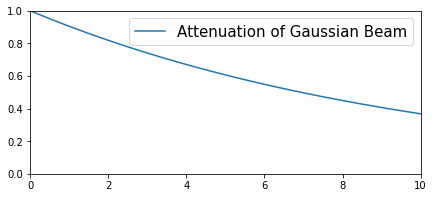

In [6]:
#making another plot with the same setup, just look at the comments in the first plot

atten_beam = plt.figure()
atten_beam.set_size_inches(7,3)
ax_atten_beam = atten_beam.add_subplot(111)
ax_atten_beam.set_ylim(0,1)
ax_atten_beam.set_xlim(0,10)
intensity = ax_atten_beam.plot(x_sample_length, I_atten, label = 'Attenuation of Gaussian Beam')
#x_label_atten_beam = ax_atten_beam.set_xlabel('Sample Length (cm)')
#y_label_atten_beam = ax_atten_beam.set_ylabel('Normalized Intensity')
ax_atten_beam.legend(fontsize=15)
atten_beam.show()

In [7]:
u=np.linspace(0.0,1000.0,100)
v=np.ones(10)

In [8]:
U, V = np.meshgrid(u, v)

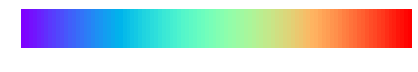

In [9]:
spectrum = plt.figure(figsize=(7,3))
ax_spectrum = spectrum.add_subplot(111)
ax_spectrum.set_axis_off()
visible = ax_spectrum.imshow(U, cmap='rainbow')
spectrum.savefig('visible-light.png',format='png')

In [10]:
c = 2.99792458 * 10**8
infrared_range = np.array([2.0,2.5])*10**-6
microwave_range = np.array([0.001,1])
electronic_range = np.array([380, 940])*10**-9
total_range = np.array([1*10**-10,10])

In [11]:
def frequency_from_wavelength (wavelength):
    frequency = c / wavelength
    return frequency

In [12]:
frequency_from_wavelength(infrared_range)

array([1.49896229e+14, 1.19916983e+14])

In [13]:
frequency_from_wavelength(microwave_range)

array([2.99792458e+11, 2.99792458e+08])

In [14]:
frequency_from_wavelength(electronic_range)

array([7.88927521e+14, 3.18928147e+14])

In [15]:
frequency_from_wavelength(total_range)

array([2.99792458e+18, 2.99792458e+07])

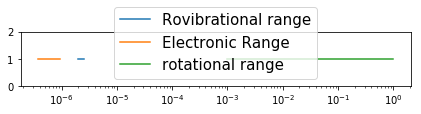

In [16]:
y_value = np.array([1,1])
frequency_ranges = plt.figure()
frequency_ranges.set_size_inches(7,1)
frequency_ranges_ax = frequency_ranges.add_subplot(111)
frequency_ranges_ax.set_ylim(0,2)
plt.xscale('log')
ir = frequency_ranges_ax.plot(infrared_range, y_value, label =  'Rovibrational range')
vis = frequency_ranges_ax.plot(electronic_range, y_value, label = 'Electronic Range')
mw = frequency_ranges_ax.plot(microwave_range, y_value, label = 'rotational range')
frequency_ranges_ax.legend(fontsize = 15)
frequency_ranges.show()
frequency_ranges.savefig('ranges_of_transitions.png',format='png')